In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras

from sklearn import svm

import numpy as np

In [2]:
# Direct Kernel Set Training Data
dks_train_1 = pd.read_csv('data/Direct_Kernel_Set_I_Training.csv')
dks_train_2 = pd.read_csv('data/Direct_Kernel_Set_II_Training.csv')
dks_train_3 = pd.read_csv('data/Direct_Kernel_Set_III_Training.csv')

# Direct Kernel Set Classifcation Data
dks_class_1 = pd.read_csv('data/Direct_Kernel_Set_I_Classifications.csv')
dks_class_2 = pd.read_csv('data/Direct_Kernel_Set_II_Classifications.csv')

# Direct Kernel Set Classication Results Only Data
dks_results_1 = pd.read_csv('data/Direct_Kernel_Set_I_Classifications_ResultsOnly.csv')
dks_results_2 = pd.read_csv('data/Direct_Kernel_Set_II_Classifications_ResultsOnly.csv')
dks_results_3 = pd.read_csv('data/Direct_Kernel_Set_III_Classifications_ResultsOnly.csv')

In [3]:
# Variational Set 1 Training Data
var_train_1d0 = pd.read_csv('data/Variational_Set_I_d0_Training.csv')
var_train_1d1 = pd.read_csv('data/Variational_Set_I_d1_Training.csv')
var_train_1d2 = pd.read_csv('data/Variational_Set_I_d2_Training.csv')
var_train_1d3 = pd.read_csv('data/Variational_Set_I_d3_Training.csv')
var_train_1d4 = pd.read_csv('data/Variational_Set_I_d4_Training.csv')


# Variational Set 2 Training Data
var_train_2d0 = pd.read_csv('data/Variational_Set_II_d0_Training.csv')
var_train_2d1 = pd.read_csv('data/Variational_Set_II_d1_Training.csv')
var_train_2d2 = pd.read_csv('data/Variational_Set_II_d2_Training.csv')
var_train_2d3 = pd.read_csv('data/Variational_Set_II_d3_Training.csv')
var_train_2d4 = pd.read_csv('data/Variational_Set_II_d4_Training.csv')


# Variational Set 3 Training Data
var_train_2d0 = pd.read_csv('data/Variational_Set_III_d0_Training.csv')
var_train_2d1 = pd.read_csv('data/Variational_Set_III_d1_Training.csv')
var_train_2d2 = pd.read_csv('data/Variational_Set_III_d2_Training.csv')
var_train_2d3 = pd.read_csv('data/Variational_Set_III_d3_Training.csv')
var_train_2d4 = pd.read_csv('data/Variational_Set_III_d4_Training.csv')

# Variational Set 1 Classification Results Only Data
var_class_results_1d0 = pd.read_csv('data/Variational_Set_I_d0_Classifications_ResultsOnly.csv')
var_class_results_1d1 = pd.read_csv('data/Variational_Set_I_d1_Classifications_ResultsOnly.csv')
var_class_results_1d2 = pd.read_csv('data/Variational_Set_I_d2_Classifications_ResultsOnly.csv')
var_class_results_1d3 = pd.read_csv('data/Variational_Set_I_d3_Classifications_ResultsOnly.csv')
var_class_results_1d4 = pd.read_csv('data/Variational_Set_I_d4_Classifications_ResultsOnly.csv')

# Variational Set 2 Classification Results Only Data
var_class_results_2d0 = pd.read_csv('data/Variational_Set_II_d0_Classifications_ResultsOnly.csv')
var_class_results_2d1 = pd.read_csv('data/Variational_Set_II_d1_Classifications_ResultsOnly.csv')
var_class_results_2d2 = pd.read_csv('data/Variational_Set_II_d2_Classifications_ResultsOnly.csv')
var_class_results_2d3 = pd.read_csv('data/Variational_Set_II_d3_Classifications_ResultsOnly.csv')
var_class_results_2d4 = pd.read_csv('data/Variational_Set_II_d4_Classifications_ResultsOnly.csv')

# Variational Set 3 Classification Results Only Data
var_class_results_3d0 = pd.read_csv('data/Variational_Set_III_d0_Classifications_ResultsOnly.csv')
var_class_results_3d1 = pd.read_csv('data/Variational_Set_III_d1_Classifications_ResultsOnly.csv')
var_class_results_3d2 = pd.read_csv('data/Variational_Set_III_d2_Classifications_ResultsOnly.csv')
var_class_results_3d3 = pd.read_csv('data/Variational_Set_III_d3_Classifications_ResultsOnly.csv')
var_class_results_3d4 = pd.read_csv('data/Variational_Set_III_d4_Classifications_ResultsOnly.csv')

In [4]:
len(dks_class_1)

440

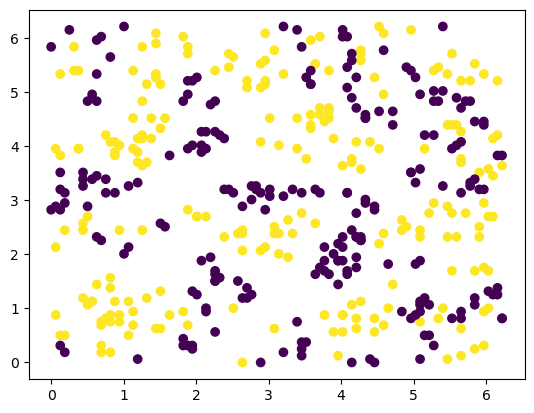

In [5]:
plt.scatter(dks_class_1.iloc[:, 1], dks_class_1.iloc[:, 2], c = dks_class_1.iloc[:, 3])
plt.show()

In [6]:
inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(8, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(8, activation = 'softmax')(x)
outputs = tf.keras.layers.Dense(1, activation = 'softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [7]:
idx = np.random.permutation(np.arange(0, len(dks_class_1)))

In [8]:
batch_size = 64
epochs = 10

x_train = dks_class_1.iloc[idx, 1:3]
y_train = dks_class_1.iloc[idx, 3]

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 8) dtype=float32, numpy=
 array([[ 0.48180923, -0.5566498 ,  0.25331303,  0.58247125, -0.42287773,
         -0.11132777, -0.01585297,  0.55878186],
        [-0.46869776, -0.48060647, -0.50441223, -0.21427436, -0.37065014,
         -0.12212664,  0.12178616, -0.12841365]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([ 0.07192644,  0.        , -0.06432278, -0.06152227,  0.        ,
         0.        ,  0.0874412 , -0.05548313], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 8) dtype=float32, numpy=
 array([[-0.25552386,  0.01830965,  0.20525272, -0.5618669 ,  0.54167414,
         -0.09168734,  0.35534233,  0.5629947 ],
        [ 0.01941752, -0.33316895, -0.34291175,  0.6079133 ,  0.09549487,
          0.5808374 ,  0.06780857, -0.5068006 ],
        [ 0.06888099, -0.24019355, -0.49405676,  0.12892307,  0.22152953,
          0.35630384,  0.01676237,  0.65724206],
        [-0.6290303 ,  0.317126  

In [10]:
x_train = dks_class_1.iloc[idx, 1:3]
y_train = dks_class_1.iloc[idx, 3]

x_test = dks_train_1.iloc[:, 1:3]
y_test = dks_train_1.iloc[:, 3]

In [60]:
svm_model = svm.SVC(C = 5, kernel = "rbf", gamma = 5)
svm_model.fit(x_train, y_train)

SVC(C=5, gamma=5)

In [61]:
y_pred = svm_model.predict(x_test)

In [62]:
np.mean((y_test - y_pred)**2)

0.3

In [63]:
np.mean(y_test == y_pred)

0.925

In [64]:
x_train

,Data,Unnamed: 2
341,4.021239,6.031858
306,4.146902,2.450442
264,5.654867,0.816814
17,1.445133,5.340708
68,3.769911,0.879646
...,...,...
44,5.969026,1.759292
319,3.769911,1.696460
19,4.712389,1.445133
258,6.157522,1.256637


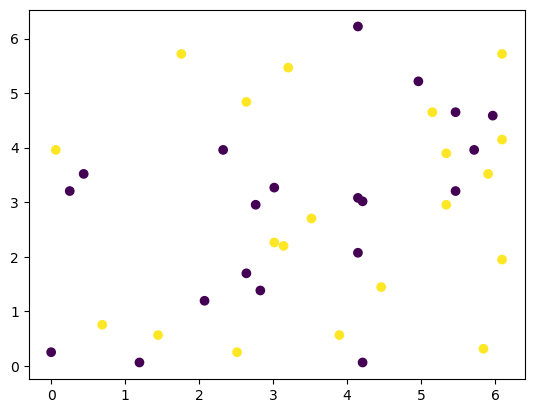

In [65]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test)
plt.show()

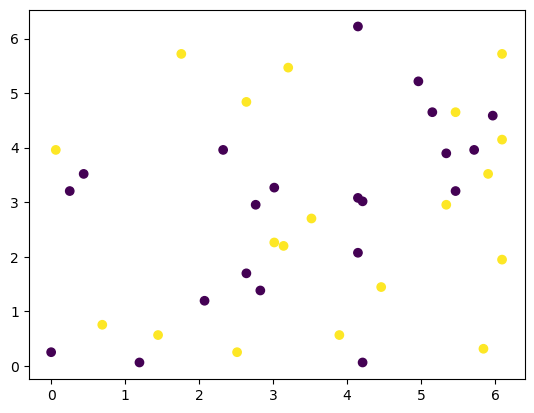

In [66]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_pred)
plt.show()

In [67]:
svm_model.support_

array([  0,   2,   5,  10,  11,  12,  29,  30,  34,  35,  36,  54,  58,
        59,  66,  70,  79,  97, 100, 101, 106, 108, 113, 123, 137, 145,
       147, 153, 162, 163, 169, 170, 174, 176, 178, 189, 190, 194, 196,
       204, 207, 211, 218, 223, 226, 227, 235, 237, 238, 239, 240, 241,
       245, 246, 252, 261, 262, 270, 272, 273, 275, 282, 285, 288, 289,
       295, 298, 302, 304, 309, 310, 311, 312, 316, 317, 322, 325, 327,
       333, 338, 347, 352, 353, 358, 370, 389, 396, 401, 405, 408, 412,
       422, 425, 428, 429, 432, 434,   4,   6,  15,  17,  18,  27,  28,
        32,  42,  45,  48,  53,  56,  57,  60,  61,  72,  74,  77,  82,
        83,  84,  88,  91,  99, 102, 107, 120, 125, 129, 131, 132, 133,
       139, 142, 148, 157, 165, 182, 185, 191, 192, 195, 197, 198, 200,
       208, 212, 215, 219, 220, 231, 244, 250, 253, 255, 258, 259, 264,
       265, 276, 290, 291, 294, 297, 299, 303, 306, 315, 319, 323, 328,
       331, 332, 334, 339, 351, 355, 357, 362, 363, 367, 368, 36